In [1]:
import numpy as np
import numpy as np
import logging
from scipy.stats import norm
import dora.active_sampling as sampling
import time
from dora.active_sampling import pltutils
import matplotlib.pyplot as pl
import matplotlib as mpl
%matplotlib inline

In [4]:
def ground_truth(X):
    """ A binary image of a circle as a test problem for sampling. """
    result = (np.sum((np.asarray(X) - 0.5)**2, axis=-1) < 0.1).astype(float)
    return result

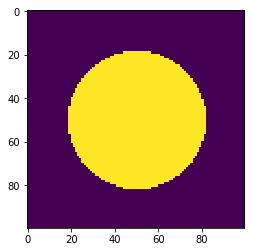

In [17]:
lower = [0, 0]
upper = [1, 1]
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
xx, yy = np.meshgrid(x, y)
xxq = np.hstack([np.reshape(xd, (-1,1)) for xd in (xx, yy)])
f = np.reshape(ground_truth(xxq), xx.shape)
imgplot = pl.imshow(f)

In [18]:
n_train = 8
acq_name = 'pred_upper_bound'
explore_priority = 1.0
sampler = sampling.GaussianProcess(lower, upper, acq_name=acq_name,
                                           n_train=n_train, seed=11)

In [19]:
n = 10
p = np.random.uniform(0, 1, (n,2))
q = simulate_measurement(p)[:,np.newaxis]
xq, uid = sampler.pick()
print('Parameter:',xq)
print('Unique ID:',uid)
yq_true = ground_truth(xq)
print('Observation value:', yq_true)
sampler.update(uid, yq_true)
print('Sampler has been updated with the new observation value')

Parameter: [ 0.75897959  0.81827536]
Unique ID: 72ab5c1172bd4902814902dcc528059d
Observation value: 0.0
Sampler has been updated with the new observation value


In [20]:
for i in range(n_train-1):
    xq, uid = sampler.pick()
    yq_true = ground_truth(xq)
    sampler.update(uid, yq_true)

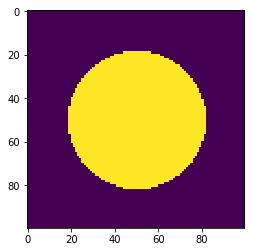

In [21]:
imgplot = pl.imshow(f)

In [62]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [63]:
p = figure(x_range=(0, 1), y_range=(0, 1))
p.image(image=[f], x=x, y=y, dw=1, dh=1, palette="Blues8")
colors = ['yellow', 'red']
color = [colors[int(i)] for i in sampler.y]
p.scatter(sampler.X[:,0], sampler.X[:,1], radius=0.01, color=color)
show(p)

/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


In [64]:
xq, uid = sampler.pick()

      fun: 3.4484774092100645
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.55271368e-07,   1.02140518e-06,  -5.32907052e-07,
         4.76084683e-01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 215
      nit: 22
   status: 0
  success: True
        x: (0.4362430278338887, 0.37312598788527734, 0.23959024033803808, -6.0)


In [66]:
mf, vf = [np.reshape(p, xx.shape) for p in sampler.predict(xxq)]

In [67]:
p = figure(x_range=(0, 1), y_range=(0, 1))
p.image(image=[mf], x=x, y=y, dw=1, dh=1, palette="Blues8")
colors = ['yellow', 'red']
color = [colors[int(i)] for i in sampler.y]
p.scatter(sampler.X[:,0], sampler.X[:,1], radius=0.01, color=color)
show(p)

/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


In [68]:
p = figure(x_range=(0, 1), y_range=(0, 1))
p.image(image=[vf], x=x, y=y, dw=1, dh=1, palette="Blues8")
colors = ['yellow', 'red']
color = [colors[int(i)] for i in sampler.y]
p.scatter(sampler.X[:,0], sampler.X[:,1], radius=0.01, color=color)
show(p)

/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


In [111]:
# Observe the value of the system of interest using the requested parameter value.
yq_true = ground_truth(xq)

# Update the sampler about the new observation
sampler.update(uid, yq_true)

mf, vf = [np.reshape(p, xx.shape) for p in sampler.predict(xxq)]
p = figure(x_range=(0, 1), y_range=(0, 1))
p.image(image=[mf], x=x, y=y, dw=1, dh=1, palette="Blues8")
colors = ['yellow', 'red']
color = [colors[int(i)] for i in sampler.y]
p.scatter(sampler.X[:,0], sampler.X[:,1], radius=0.01, color=color)
show(p)

p = figure(x_range=(0, 1), y_range=(0, 1))
p.image(image=[vf], x=x, y=y, dw=1, dh=1, palette="Blues8")
colors = ['yellow', 'red']
color = [colors[int(i)] for i in sampler.y]
p.scatter(sampler.X[:,0], sampler.X[:,1], radius=0.01, color=color)
show(p)

#Request a new parameter value to observe
xq, uid = sampler.pick()

/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/home/col540/dev/ml/venv/lib/python3.5/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
